In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

from sklearn.metrics import classification_report

plt.rcParams["figure.figsize"] = (30,30)
plt.rcParams['agg.path.chunksize'] = 10000

In [22]:
def heatmap(dataframe, method):
    matrix = dataframe.corr(method=method)
    columns = matrix.columns
    plt.matshow(matrix, cmap='coolwarm')
    plt.colorbar()
    plt.title(f"{str(method).capitalize()} correlation")
    
    plt.xticks(range(len(columns)), columns, rotation=30, ha='left')
    plt.yticks(range(len(columns)), columns)
    for (x, y), value in np.ndenumerate(matrix):
        plt.text(x, y, round(value,2), ha='center')

In [24]:
df = pd.read_csv("../data/heart_2020_cleaned.csv")
labels = ["red" if elem == 2.0 else "green" for elem in df["CoronaryHeartDisease"]]
color_dict = {True: "red", False: "green"}
df

,CoronaryHeartDisease,MyocardialInfarction,KidneyDisease,SkinCancer,_BMI5,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma
0,2.0,2.0,2.0,1.0,16.60,1.0,1.0,2.0,3.0,30.0,2.0,2.0,8.0,1.0,1.0,1.0,2.0,5.0,1.0
1,2.0,2.0,2.0,2.0,20.34,2.0,1.0,1.0,0.0,0.0,2.0,2.0,13.0,1.0,3.0,1.0,2.0,7.0,2.0
2,2.0,2.0,2.0,2.0,26.58,1.0,1.0,2.0,20.0,30.0,2.0,1.0,10.0,1.0,1.0,1.0,4.0,8.0,1.0
3,2.0,2.0,2.0,1.0,24.21,2.0,1.0,2.0,0.0,0.0,2.0,2.0,12.0,1.0,3.0,2.0,3.0,6.0,2.0
4,2.0,2.0,2.0,2.0,23.71,2.0,1.0,2.0,28.0,0.0,1.0,2.0,5.0,1.0,3.0,1.0,2.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318953,2.0,1.0,2.0,2.0,27.41,1.0,1.0,2.0,7.0,0.0,1.0,1.0,9.0,5.0,1.0,2.0,4.0,6.0,1.0
318954,2.0,2.0,2.0,2.0,29.84,1.0,1.0,2.0,0.0,0.0,2.0,1.0,4.0,5.0,3.0,1.0,2.0,5.0,1.0
318955,2.0,2.0,2.0,2.0,24.24,2.0,1.0,2.0,0.0,0.0,2.0,2.0,6.0,5.0,3.0,1.0,3.0,6.0,2.0
318956,2.0,2.0,2.0,2.0,32.81,2.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,5.0,3.0,2.0,3.0,12.0,2.0


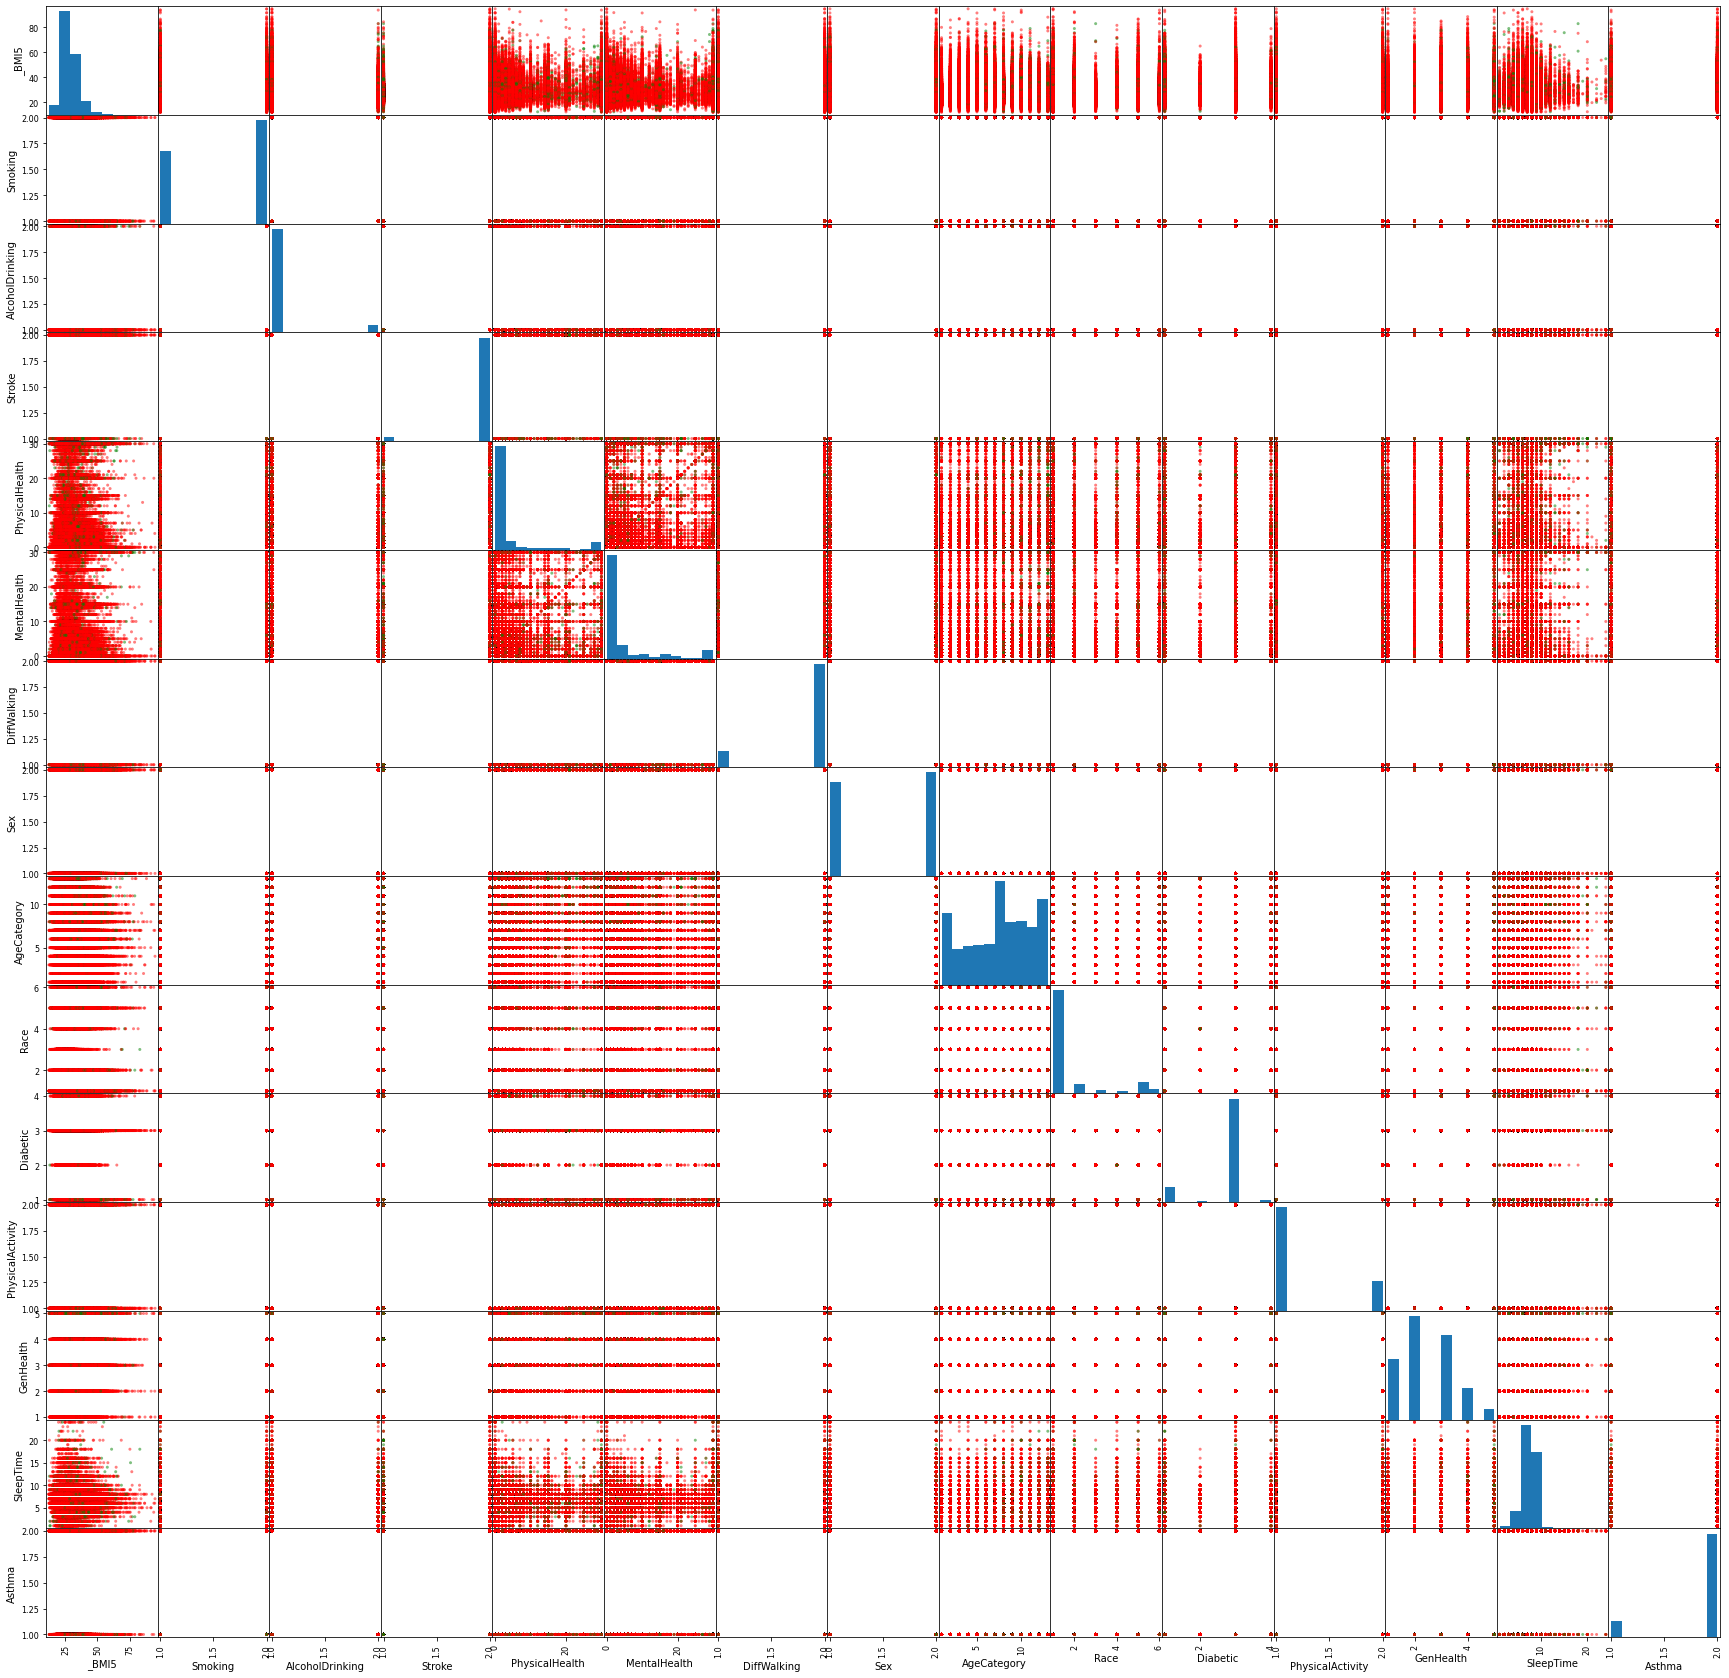

In [26]:
pd.plotting.scatter_matrix(df[df.columns[4:]], figsize=(30,30), color=labels);

In [58]:
df["CHD"] = df["CoronaryHeartDisease"] 

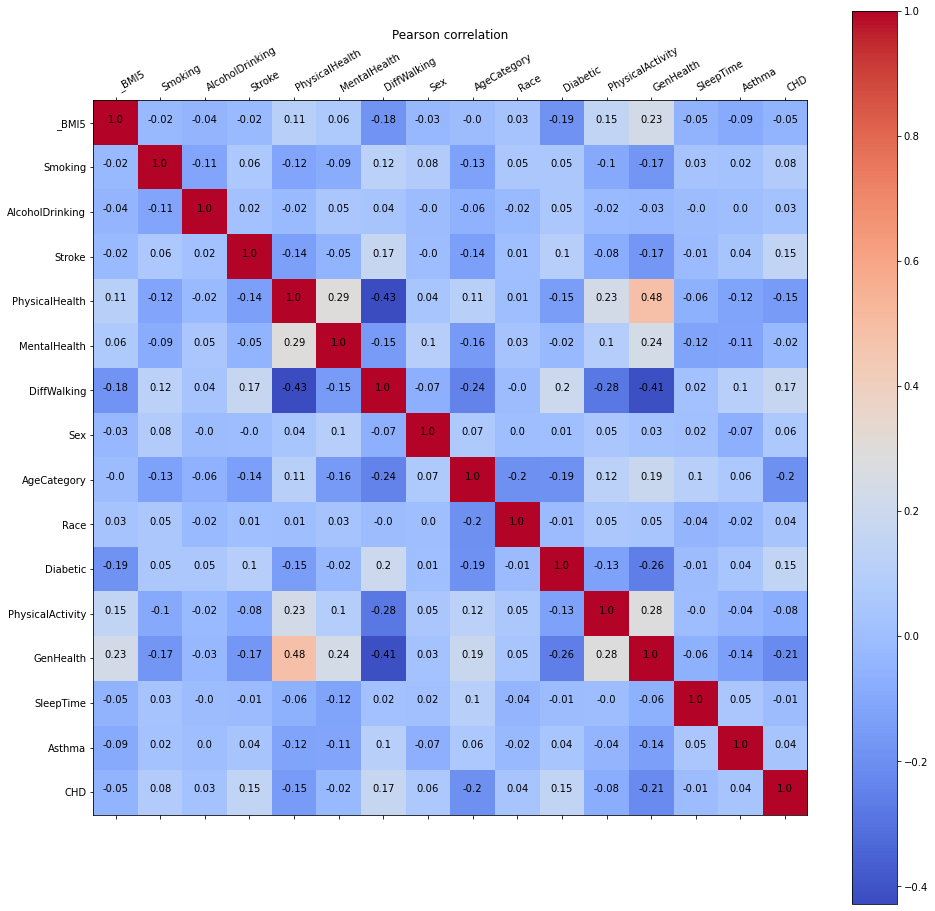

In [59]:
heatmap(df[df.columns[4:]], "pearson")

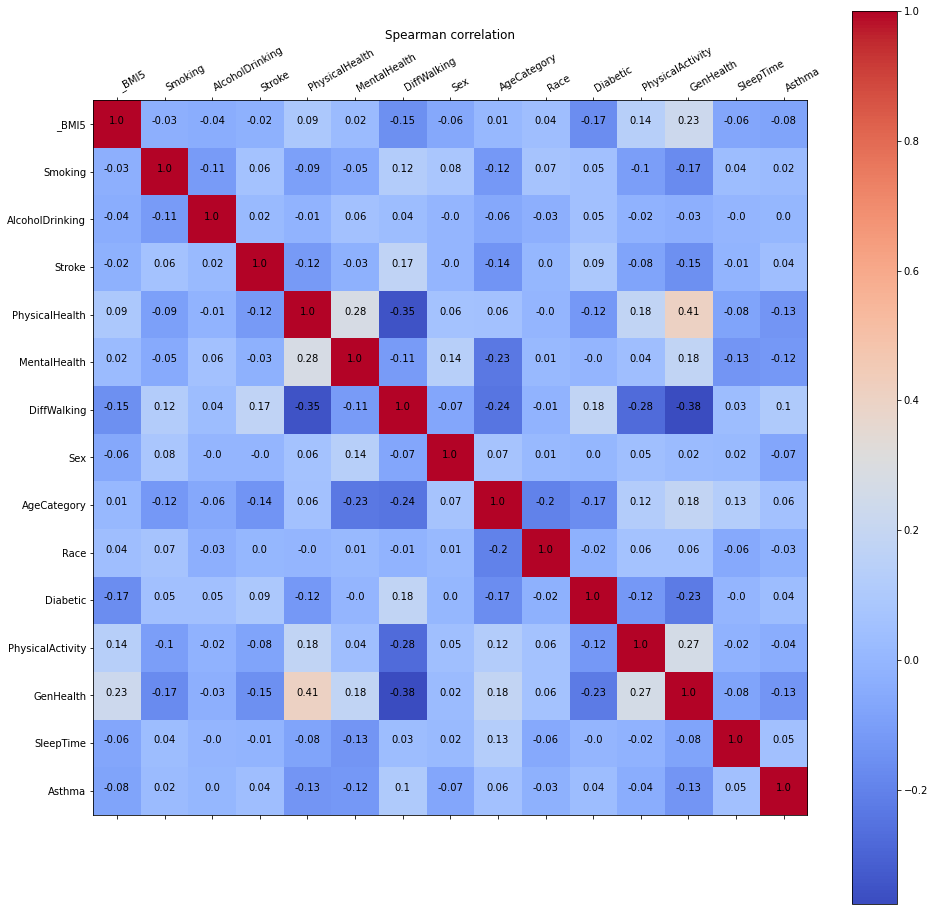

In [25]:
heatmap(df[df.columns[4:]], "spearman")

In [20]:
# Notes:
# From https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# In binary classification:
# - recall of the positive class is also known as “sensitivity”; 
# - recall of the negative class is “specificity”.
#
# CHD = 1 (positive CHD)
# No CHD = 0 (negative CHD)

features_reduction_techniques = ["PCA", "LDA"]
classifiers = ["EMDC", "MMDC", "FLDA"]

def report(path, classifier_name, feature_reduction_name, n_folds=10):
    sensitivity, specificity, accuracy = [], [], [] 
    for i in range(1, n_folds + 1):
        clf_values = pd.read_csv(f"{path}{classifier_name}_{feature_reduction_name}_{i}.csv")
        metrics = classification_report(clf_values["y"].to_list(), clf_values["ypred"].to_list(), output_dict=True)
        accuracy.append(round(metrics["accuracy"], 2))
        sensitivity.append(round(metrics["1"]["recall"], 2))
        specificity.append(round(metrics["0"]["recall"], 2))
    print(accuracy)
    print(sensitivity)
    print(specificity)
    return round(mean(accuracy), 2) , round(mean(sensitivity), 2) , round(mean(specificity), 2)


report("./", "teste", "teste", n_folds=2)

[0.9, 0.7]
[0.83, 0.6]
[1.0, 0.8]


(0.8, 0.71, 0.9)

In [ ]:
N_FOLDS = 10
path = "./"
print(" ACC  SST   SPF ")
for frt in features_reduction_techniques:
    for clf in classifiers:
        print(report(path, clf, frt, n_folds=N_FOLDS), end="   ")
        print(f"[{frt} -> {clf}]")